1. A customer informed their consultant that they have developed several formulations of petrol that gives different characteristics of burning pattern. The formulations are obtaining by adding varying levels of additives that, for example, prevent engine knocking, gum prevention, stability in storage, and etc. However, a third party certification organisation would like to verify if the formulations are significantly different, and request for both physical and statistical proof. Since the formulations are confidential information, they are not named in the dataset.

Please assist the consultant in the area of statistical analysis by doing this;

a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.

b. A graphical analysis of the additives, including a distribution study.

c. A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.


Analysis:

We perfromed the unsupervised learning (K-Means algorithm) to determine the distinctive number of formulations present in the dataset and also, tested if the additives are normally distributed across the formulations and checked the strong correlation between variables.
    

Outcomes:

We used scatter and density plots which shows that the additives distributions are not showing any strong distribution traits cause of outliers are present and some of the plots showed as skewed density plots. So, we used the K- means algorithm to identify value of centroid and mean values of the datapoints, and using silhouette method to find the optimal K value which shows the correlations between the formulations. Hence, we can say that even though we found some distinctive formulations, however not all formulations are distinctive. 



Loading dependencies

In [1]:
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

Read dataset and check if there is null values

In [2]:
df=pd.read_csv("C:/Users/mypratik/Desktop/PreScreen_r3/ingredient.csv")

In [3]:
df.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


In [4]:
df.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

As per above, there is no missig values in the dataset

Visualize the data

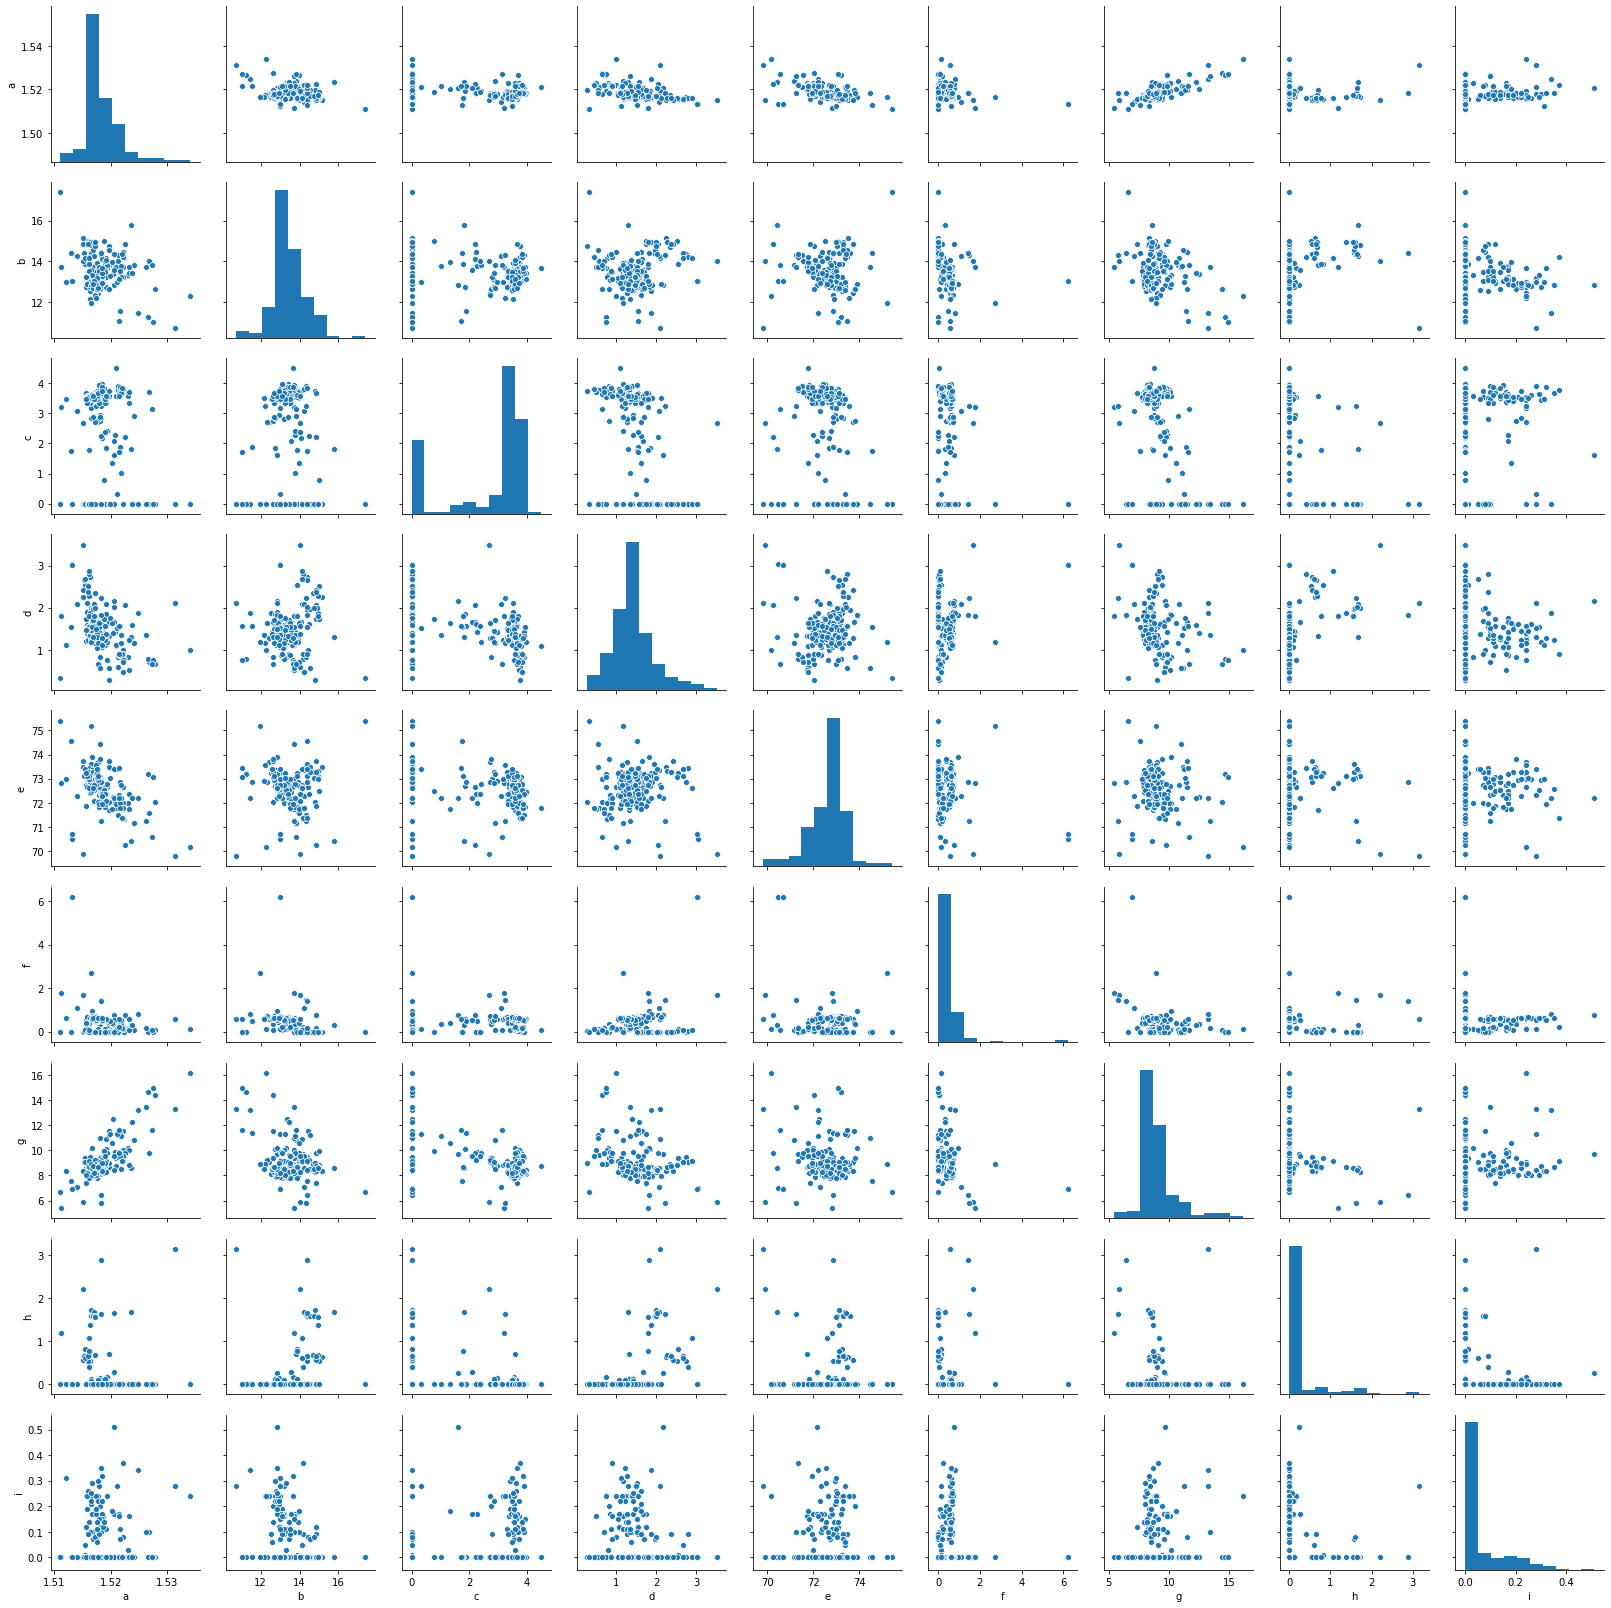

In [5]:
sns.pairplot(df)

As per the above visualization, we can see some storog co-relation between variables. Let's check the scatter and density plot and see the co-relation co-efficient of incredients given in the dataset in detail.

In [10]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.4, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

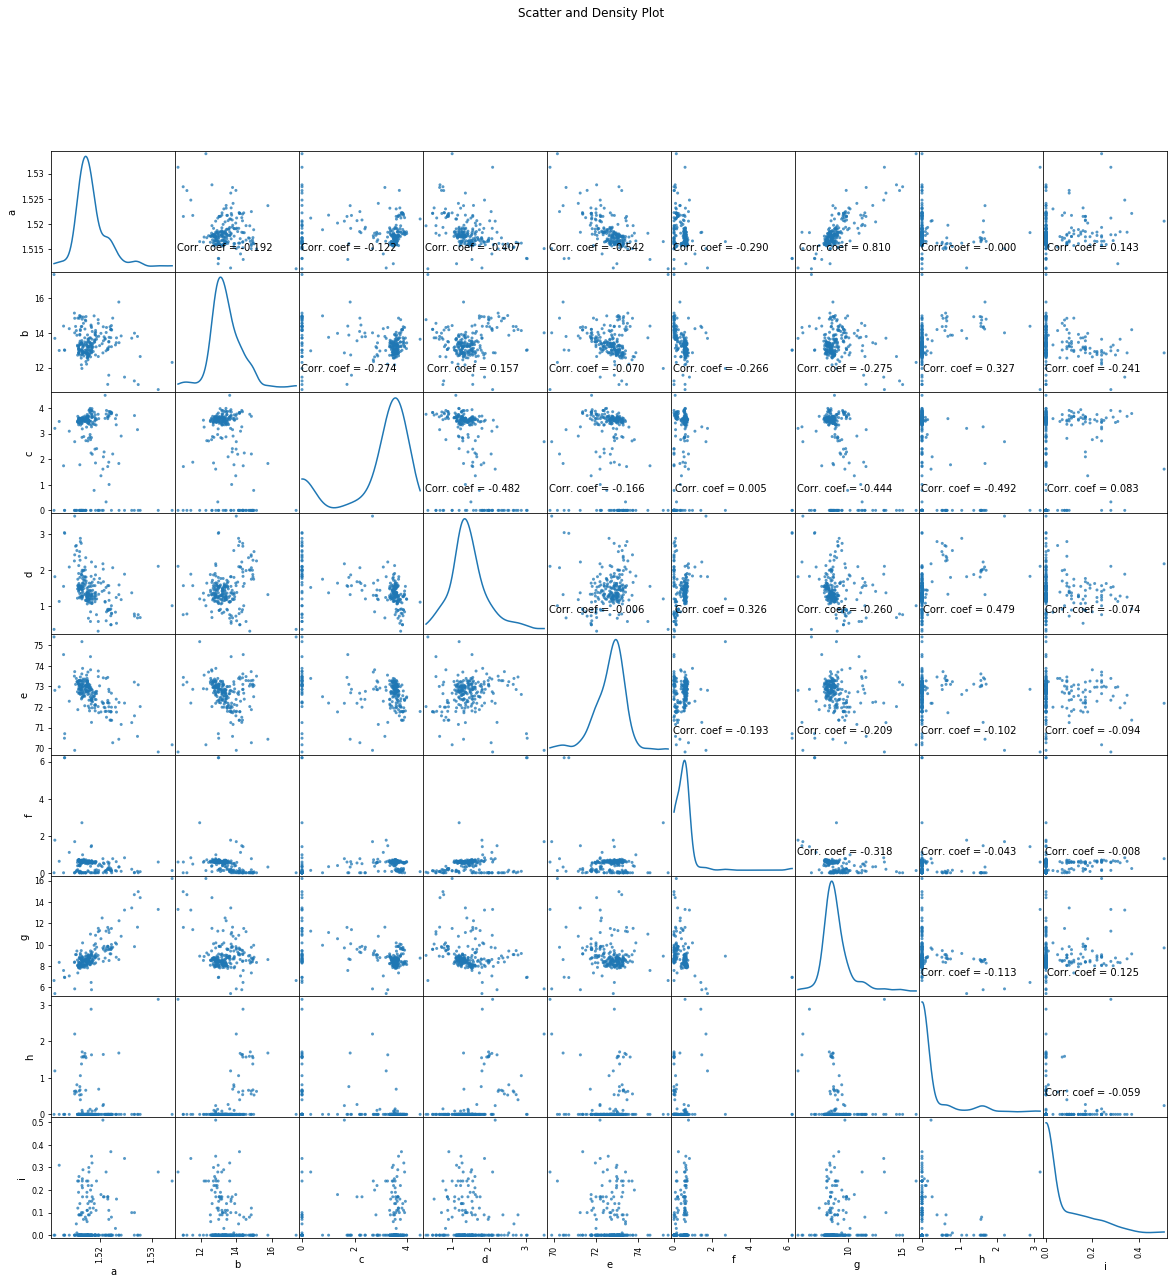

In [12]:
plotScatterMatrix(df, 20, 10)

As per the scatter and density plot, negeative co-eff shows to add negative amount of additive used to prevent engine knocking, gum prevention, stability in storage, and etc and positive co-eff shows to add positive amount of additive used to prevent engine knocking, gum prevention, stability in storage, and etc.

Adding more to the visualization to show the Correlation Matrix.

In [13]:
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.show()

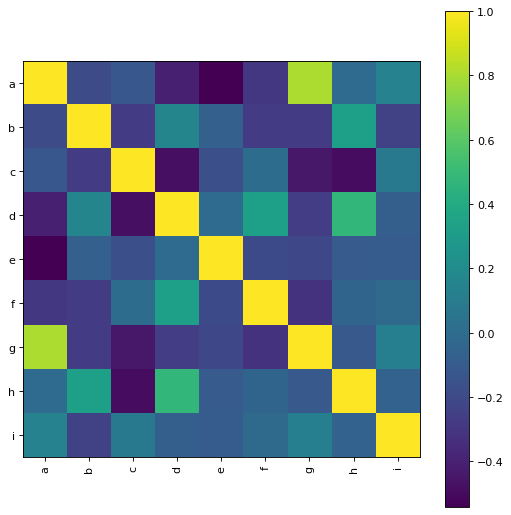

In [14]:
plotCorrelationMatrix(df, 8)

To check ANOVA analysis,we need to check how much of the total variance comes from between the grop and within the group. We do not have any groups given in the datasets as we can not perfrom the ANOVA.

We will perfrom the unsupervised learning to determine the distinctive number of formulations present in the dataset.

K-Means Clustering

Algorithm works as follows, assuming we have inputs x_1, x_2, x_3, ..., x_nx 

Step 1 - Pick K random points as cluster centers called centroids.
Step 2 - Assign each xi to nearest cluster by calculating its distance to each centroid.
Step 3 - Find new cluster center by taking the average of the assigned points.
Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

FIND THE OPTIMAL K VALUE USING silhouette

In [18]:
from sklearn import metrics
from sklearn.metrics import *
from sklearn import datasets
from sklearn.cluster import KMeans

In [19]:
silhouette_avgs= []

In [20]:
#try k from 2 to maximum number of labels
min_k=2

In [21]:
for k in range(min_k, 10):
    kmean=KMeans(n_clusters=k).fit(df)
    score=metrics.silhouette_score(df, kmean.labels_)
    print("Silhouette coeff for k=", k, "is",score)
    silhouette_avgs.append(score)

Silhouette coeff for k= 2 is 0.5606521011102593
Silhouette coeff for k= 3 is 0.5822429516169839
Silhouette coeff for k= 4 is 0.5786282644911852
Silhouette coeff for k= 5 is 0.4379506613605233
Silhouette coeff for k= 6 is 0.45197853410786154
Silhouette coeff for k= 7 is 0.4550617512669369
Silhouette coeff for k= 8 is 0.45747895150621865
Silhouette coeff for k= 9 is 0.30414414050026406


In [22]:
#find the highest value of optimal K
optimal_k= silhouette_avgs.index(max(silhouette_avgs))+ min_k

In [23]:
print("optimal K is ", optimal_k)

optimal K is  3


In [24]:
k=3

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
a    214 non-null float64
b    214 non-null float64
c    214 non-null float64
d    214 non-null float64
e    214 non-null float64
f    214 non-null float64
g    214 non-null float64
h    214 non-null float64
i    214 non-null float64
dtypes: float64(9)
memory usage: 15.1 KB


In [26]:
X=df.values

In [27]:
print(X)

[[ 1.51735 13.02     3.54    ...  8.44     0.       0.07   ]
 [ 1.53125 10.73     0.      ... 13.3      3.15     0.28   ]
 [ 1.523   13.31     3.58    ... 10.17     0.       0.03   ]
 ...
 [ 1.51784 12.68     3.67    ...  8.7      0.       0.     ]
 [ 1.51841 12.93     3.74    ...  8.96     0.       0.22   ]
 [ 1.51321 13.       0.      ...  6.93     0.       0.     ]]


In [28]:
kmeans=KMeans(n_clusters=k)

In [29]:
kmeans = kmeans.fit(X)

In [30]:
labels = kmeans.predict(X)

In [31]:
set(labels)

{0, 1, 2}

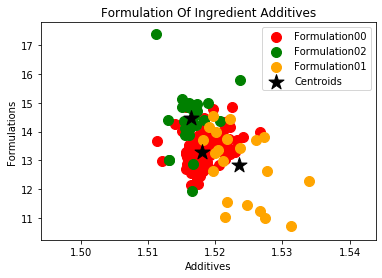

In [32]:
# Visualizing the clusters
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 100, c = 'red', label='Formulation00')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 100, c = 'green', label='Formulation02')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 100, c = 'orange', label='Formulation01')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s = 250, c = 'black', 
            label='Centroids')
plt.title('Formulation Of Ingredient Additives')
plt.xlabel('Additives')
plt.ylabel('Formulations')
plt.legend()
plt.show()

In [33]:
centroids = kmeans.cluster_centers_

In [34]:
print(centroids) 

[[1.51807772e+00 1.32800617e+01 3.45018519e+00 1.33364198e+00
  7.25923457e+01 5.11049383e-01 8.59290123e+00 4.30246914e-02
  6.36419753e-02]
 [1.52354762e+00 1.28452381e+01 4.49047619e-01 1.30523810e+00
  7.24052381e+01 2.54285714e-01 1.23833333e+01 1.50000000e-01
  7.14285714e-02]
 [1.51635839e+00 1.44567742e+01 1.97741935e-01 2.12096774e+00
  7.31235484e+01 5.88387097e-01 8.53838710e+00 8.81935484e-01
  1.25806452e-02]]
